In [ ]:
import os, sys, subprocess

REPO = "https://github.com/jongmoonha/Signal_Processing_Practice.git"
DIR  = "Signal_Processing_Practice"

try:
    import google.colab  # Colab 전용 모듈
    if not os.path.isdir(DIR):
        subprocess.run(["git","clone",REPO], check=True)
    print('We are in Google Colab environment.')
    os.chdir('/content/'+DIR)
    print('Current working directory:', os.getcwd())

except ImportError:
    print('We are in a local environment, not Google Colab.')
    pass

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import hilbert
import utils
plt.rc('font', size=15)

# 엔진소리에 대한 Envelope 수행

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import librosa

file_path1 = './data/autorash.mp3'
y1, sr1 = librosa.load(file_path1, sr=None)

file_path2 = './data/knocking.mp3'
y2, sr2 = librosa.load(file_path2, sr=None)


a = y1 # autorash
k = y2 # knocking

print(np.shape(a))
print(np.shape(k))
print(sr1)
print(sr2)

(81792,)
(51840,)
44100
44100


In [5]:
slice_length = len(y2) # 두 음성 신호의 길이를 맞춰주기 위한 코드

# Autorash 데이터

v_a = a[:slice_length]
T_a = len(v_a) / sr1
t_a = np.arange(1/sr1, T_a + 1/sr1, 1/sr1)

# Knocking 데이터
v_k = k
T_k = len(v_k) / sr2
t_k = np.arange(1/sr2, T_k + 1/sr2, 1/sr2)

## Envelope of Autorash

Perform envelope of v_a, and plot results. upper: original (blue) with envelope (red), lower: same with x axis zoomed (0.6, 0.72)

In [ ]:
v_a_hilbert=hilbert(v_a,axis=0)
v_a_envelope = abs(v_a_hilbert)

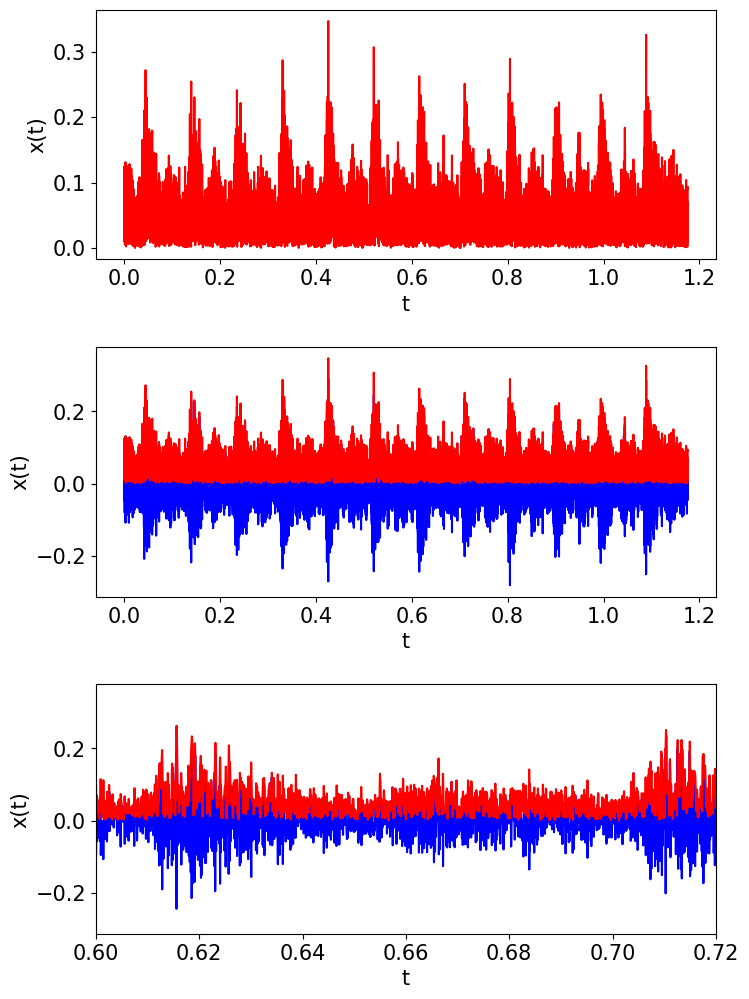

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(t_a,v_a,'b')
plt.plot(t_a,v_a_envelope,'r')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplot(2,1,2)
plt.plot(t_a,v_a,'b')
plt.plot(t_a,v_a_envelope,'r')
plt.xlim([0.60, 0.72])
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplots_adjust(hspace=0.35)

## Compare the frequency analysis of the results (Original vs Envelope) using (4,1) subplot  (figsize = 10,10)

1.FFT of original (0-5000 Hz), 2.FFT of original (0-100 Hz)

3.Envelope of original (0-5000 Hz), 2.Envelope of original (0-100 Hz)  -> Substract mean for each signal

Use utils.fft_simple(v, fs) function

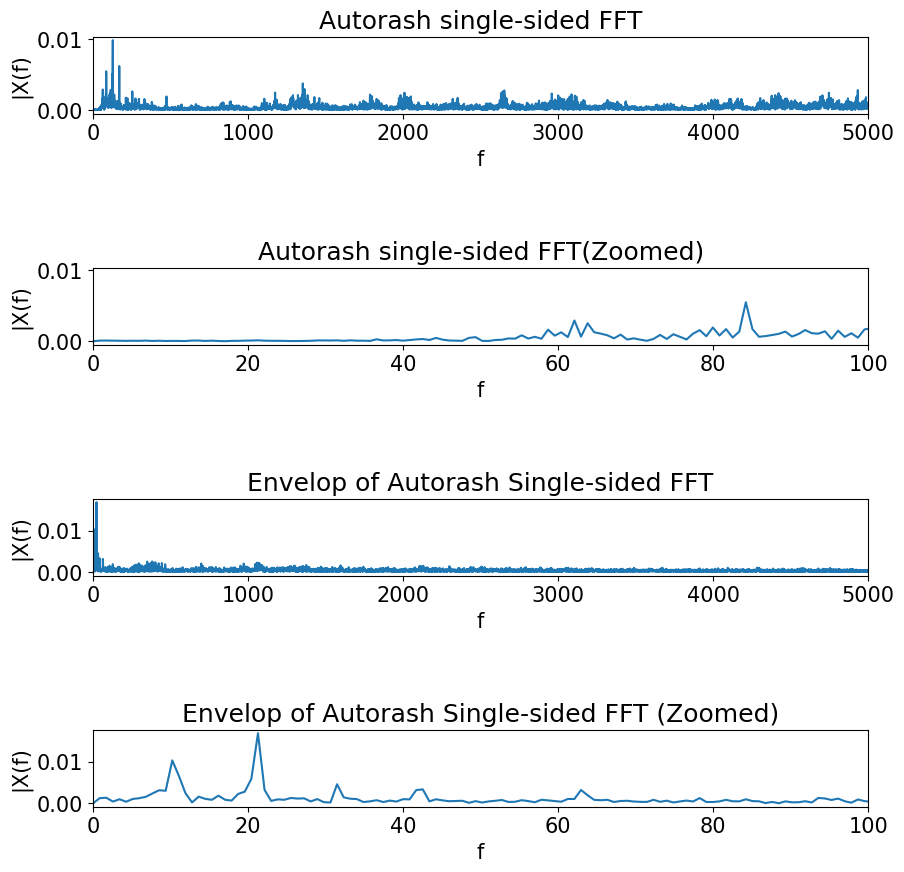

In [ ]:
F_original,A_original=utils.fft_simple(v_a-np.mean(v_a),sr1)

F_envelop,v_a_envelope=utils.fft_simple(v_a_envelope-np.mean(v_a_envelope),sr1)


plt.figure(figsize=(10,10))

plt.subplot(4,1,1)
plt.plot(F_original,A_original)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Autorash single-sided FFT')
plt.xlim([0,5000])

plt.subplot(4,1,2)
plt.plot(F_original,A_original)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Autorash single-sided FFT(Zoomed)')
plt.xlim([0,100])


plt.subplot(4,1,3)
plt.plot(F_envelop,v_a_envelope)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Envelop of Autorash Single-sided FFT')
plt.xlim([0,5000])


plt.subplot(4,1,4)
plt.plot(F_envelop,v_a_envelope)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Envelop of Autorash Single-sided FFT (Zoomed)')
plt.xlim([0,100])
plt.subplots_adjust(hspace=2)

## Envelope of Knocking

In [ ]:
v_k_hilbert=hilbert(k,axis=0)
v_k_envelope = abs(v_k_hilbert)

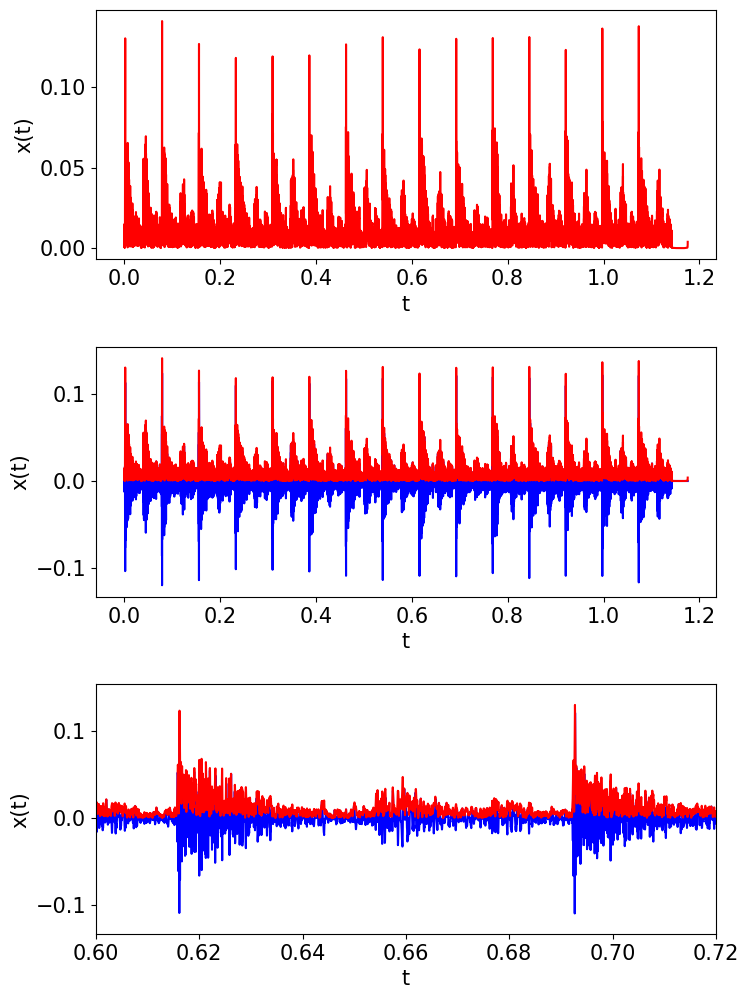

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(t_k,v_k,'b')
plt.plot(t_k,v_k_envelope,'r')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplot(2,1,1)
plt.plot(t_k,v_k,'b')
plt.plot(t_k,v_k_envelope,'r')
plt.xlim([0.60, 0.72])
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplots_adjust(hspace=0.35)

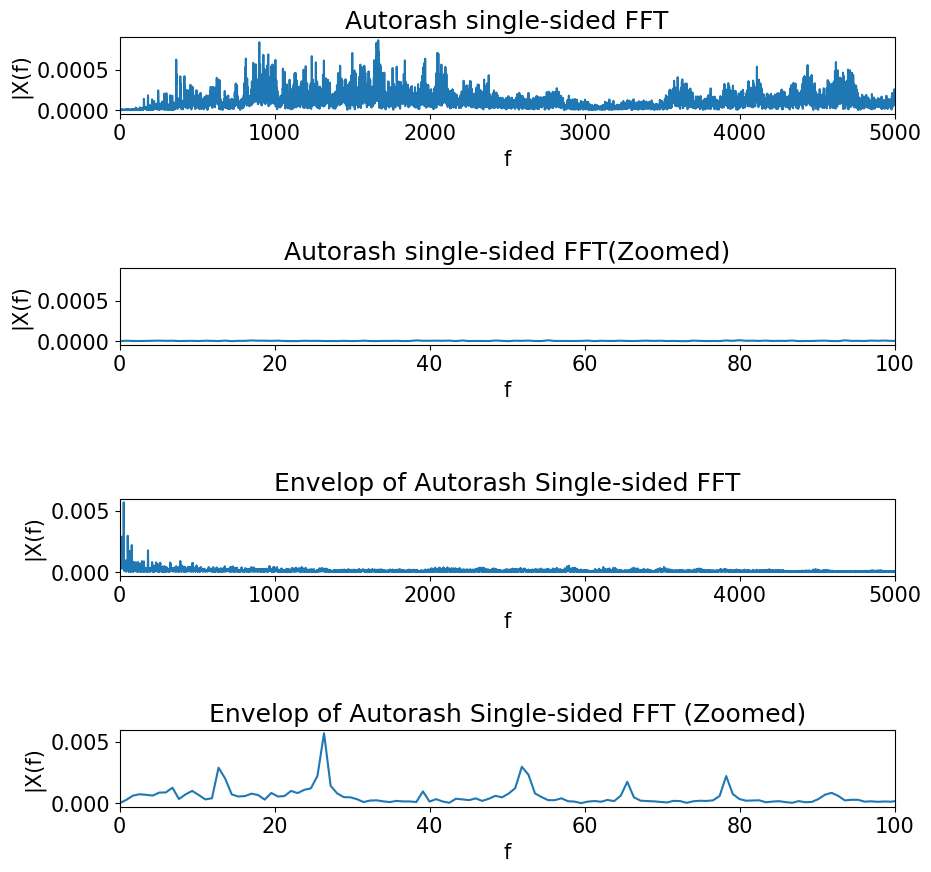

In [ ]:
F_original,A_original=utils.fft_simple(v_k-np.mean(v_k),sr2)

F_envelop,v_a_envelope=utils.fft_simple(v_k_envelope-np.mean(v_k_envelope),sr2)


plt.figure(figsize=(10,10))

plt.subplot(4,1,1)
plt.plot(F_original,A_original)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Autorash single-sided FFT')
plt.xlim([0,5000])

plt.subplot(4,1,2)
plt.plot(F_original,A_original)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Autorash single-sided FFT(Zoomed)')
plt.xlim([0,100])


plt.subplot(4,1,3)
plt.plot(F_envelop,v_a_envelope)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Envelop of Autorash Single-sided FFT')
plt.xlim([0,5000])


plt.subplot(4,1,4)
plt.plot(F_envelop,v_a_envelope)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Envelop of Autorash Single-sided FFT (Zoomed)')
plt.xlim([0,100])
plt.subplots_adjust(hspace=2)